In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

In [2]:
#Store CSV into Dataframe

df = "./Resources/train.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Store CSV into Dataframe

df2 = "./Resources/finaltest_df.csv"
test_df = pd.read_csv(df2,encoding='latin-1')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0.0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,Male,Yes,1.0,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
#Check to see how many values are in the data frame
train_df.shape

(614, 13)

In [5]:
#Confirm null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Confirm data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Remove null values 
train_df = train_df.dropna(how='any',axis=0)

In [8]:
#lets look for duplicated Loan IDs in the data set
train_df[train_df.duplicated(['Loan_ID'], keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [10]:
#train_df.to_csv(r'/Users/aliciasmith/Desktop/Final_Project/Resources/train_df.csv', index = False)


Exploratory Data Analysis

In [11]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#lets convert the remaining metrics that are strings to numeric values so we can run our models
Gender = {'Male':0, 'Female':1}
train_df.Gender=[Gender[item] for item in train_df.Gender]

Married = {'No':0, 'Yes':1}
train_df.Married=[Married[item] for item in train_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
train_df.Education=[Education[item] for item in train_df.Education]

Self_Employed = {'No':0, 'Yes':1}
train_df.Self_Employed=[Self_Employed[item] for item in train_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
train_df.Property_Area=[Property_Area[item] for item in train_df.Property_Area]

Loan_Status = {'N':0, 'Y':1}
train_df.Loan_Status=[Loan_Status[item] for item in train_df.Loan_Status]



Gender = {'Male':0, 'Female':1}
test_df.Gender=[Gender[item] for item in test_df.Gender]

Married = {'No':0, 'Yes':1}
test_df.Married=[Married[item] for item in test_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
test_df.Education=[Education[item] for item in test_df.Education]

Self_Employed = {'No':0, 'Yes':1}
test_df.Self_Employed=[Self_Employed[item] for item in test_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
test_df.Property_Area=[Property_Area[item] for item in test_df.Property_Area]

C:\Users\Pooja\.conda\envs\PythonData\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


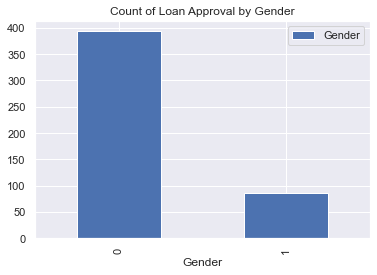

In [13]:
#Creating a dataframe grouping by the column 'Gender'
gender_df = train_df.groupby('Gender')


#Record count number of data points for each day
gender_count_df = pd.DataFrame.from_dict(gender_df['Gender'].count())
gender_count_df

#Bar Chart based off of the group series 
gender_count_chart = gender_count_df.plot(kind='bar', title= "Count of Loan Approval by Gender")


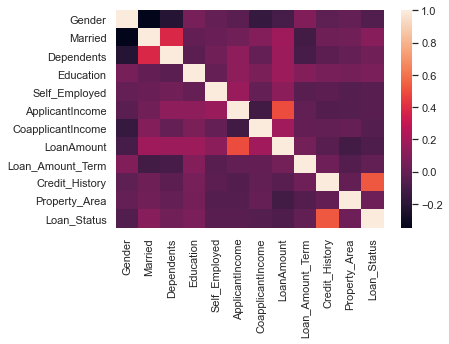

In [14]:
#checking for multicollinearity
corr = train_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.autoscale()

C:\Users\Pooja\.conda\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gender'>

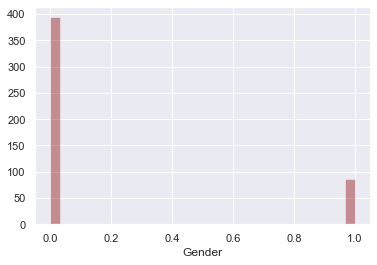

In [15]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Gender'],kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Married'>

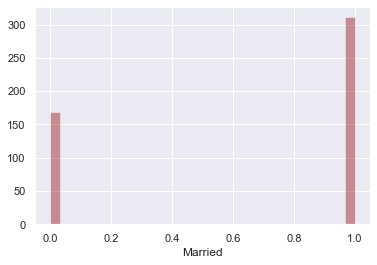

In [16]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Married'],kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Education'>

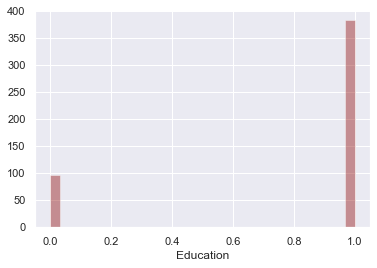

In [17]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Education'],kde=False,color='darkred',bins=30)

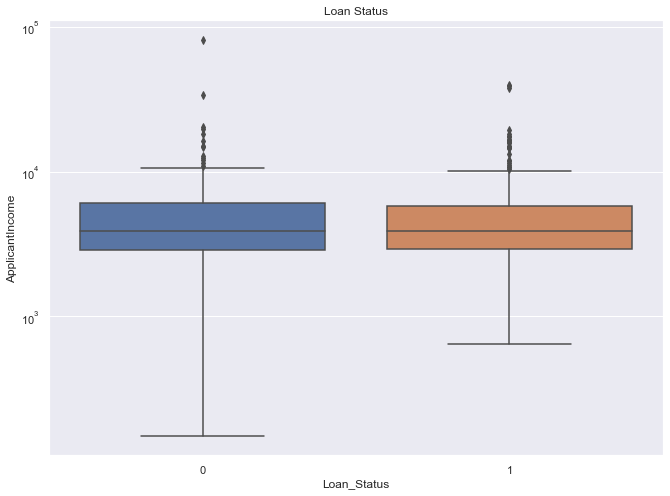

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [18]:

#Create boxplot for Loan status depends on Applicant Income

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'ApplicantIncome',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

#plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['ApplicantIncome'].median()
Refused_amount_median=Refused_loans['ApplicantIncome'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

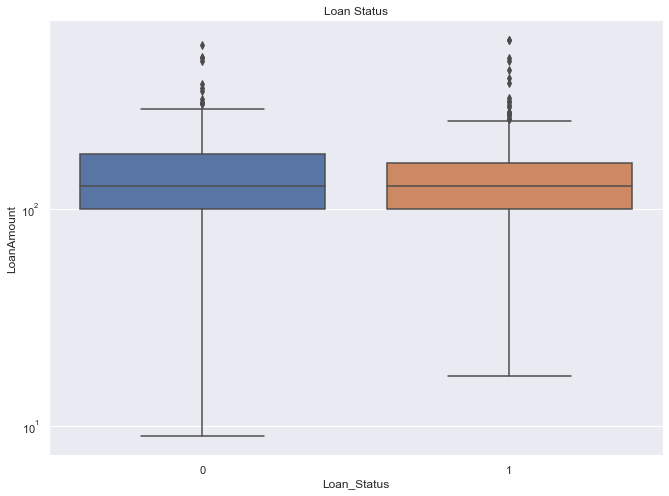

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [19]:
#Create boxplot for Loan status depends on Loan Amount

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'LoanAmount',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

# plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['LoanAmount'].median()
Refused_amount_median=Refused_loans['LoanAmount'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

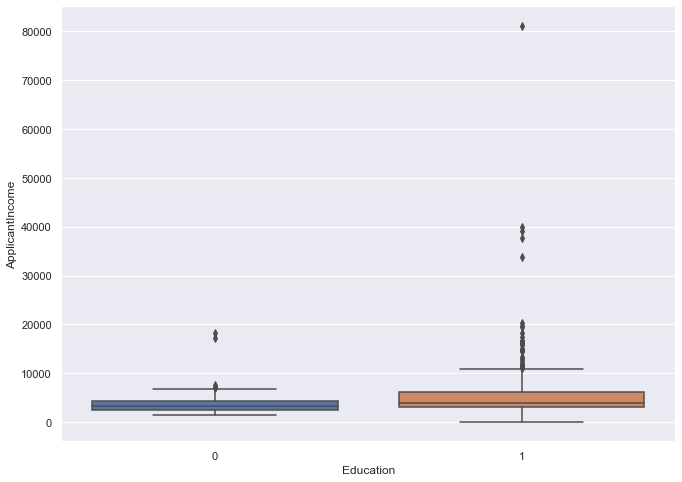

It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.


In [20]:
# Create Box plot using education level against the income

plt.figure(figsize=(11,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=train_df)
# plt.savefig("Images/BoxPlot.png")
plt.show()

print(f"It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.")

## SVM Machine Learning Model

In [21]:
# SVM Machine Learning Model

from sklearn.neighbors import KNeighborsClassifier

In [22]:
#drop the loan id from the dataset, we do not need this for the machine learning models
test_df.drop('Loan_ID', axis=1, inplace=True)
train_df.drop('Loan_ID', axis=1, inplace=True)


C:\Users\Pooja\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
target = train_df["Loan_Status"]
target_names = ["Approved", "Refused"]

In [26]:
data = train_df.drop("Loan_Status", axis=1)
feature_names = data.columns
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,2


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [28]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.783


In [30]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Approved       1.00      0.32      0.48        38
     Refused       0.76      1.00      0.86        82

    accuracy                           0.78       120
   macro avg       0.88      0.66      0.67       120
weighted avg       0.84      0.78      0.74       120

